Epoch [1/10], Loss: 0.0611
Epoch [2/10], Loss: 0.0302
Epoch [3/10], Loss: 0.0243
Epoch [4/10], Loss: 0.0208
Epoch [5/10], Loss: 0.0183
Epoch [6/10], Loss: 0.0167
Epoch [7/10], Loss: 0.0154
Epoch [8/10], Loss: 0.0143
Epoch [9/10], Loss: 0.0136
Epoch [10/10], Loss: 0.0129


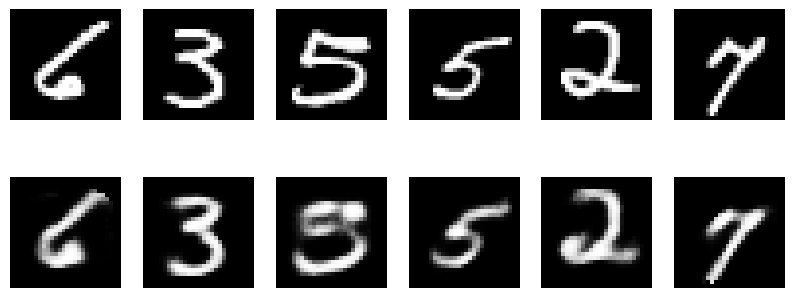

In [6]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# ----------------------------
# 1️⃣ Load MNIST Dataset
# ----------------------------

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# ----------------------------
# 2️⃣ Define Autoencoder
# ----------------------------

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)   # latent dim = 12
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent

model = Autoencoder()

# ----------------------------
# 3️⃣ Loss & Optimizer
# ----------------------------

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----------------------------
# 4️⃣ Training Loop
# ----------------------------

epochs = 10

for epoch in range(epochs):
    total_loss = 0
    
    for images, _ in train_loader:
        
        images = images.view(-1, 784)
        
        reconstructed, _ = model(images)
        loss = criterion(reconstructed, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

# ----------------------------
# 5️⃣ Visualize Reconstruction
# ----------------------------

images, _ = next(iter(train_loader))
images_flat = images.view(-1, 784)

reconstructed, _ = model(images_flat)

images = images.view(-1, 28, 28)
reconstructed = reconstructed.view(-1, 28, 28).detach()

fig, axes = plt.subplots(2, 6, figsize=(10,4))

for i in range(6):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(reconstructed[i], cmap='gray')
    axes[1, i].axis('off')

plt.show()

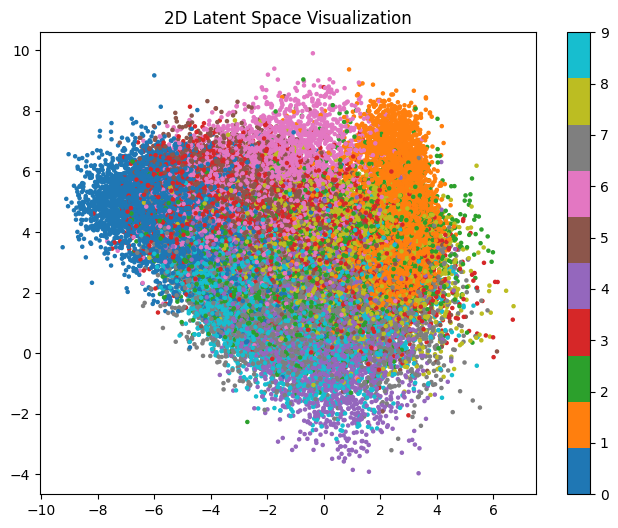

In [7]:
import matplotlib.pyplot as plt

model.eval()

all_latents = []
all_labels = []

with torch.no_grad():
    for images, labels in train_loader:
        
        images = images.view(-1, 784)
        _, latent = model(images)
        
        all_latents.append(latent)
        all_labels.append(labels)

# Combine all batches
all_latents = torch.cat(all_latents)
all_labels = torch.cat(all_labels)

# Convert to numpy
latents_np = all_latents.numpy()
labels_np = all_labels.numpy()

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    latents_np[:,0],
    latents_np[:,1],
    c=labels_np,
    cmap='tab10',
    s=5
)

plt.colorbar(scatter)
plt.title("2D Latent Space Visualization")
plt.show()